### Dygresja na nagrodę nobla za topologiczne przejścia fazowe
Model magnetyka 2D XY (ten który już nie jest modelem Isinga ale jeszcze nie jest modelem Schrodingera)

$$H = -J \vec{S_n} \cdot \vec{S_m}$$
$$S_n = S_nx \hat{e_x} + S_ny \hat{e_y}$$

* Parametr porządku - ile składowych wektora
* Dwuwymiarowa siatka

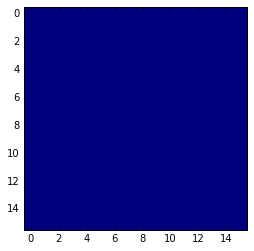

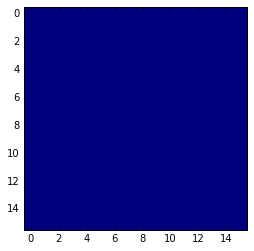

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 16
spiny = np.zeros((2, N, N))
spiny[0,:,:] = 1

plt.imshow(spiny[0])
plt.show()
plt.imshow(spiny[1])

In [16]:
J = 1
beta = 1
def flip(spin_index):
    directions = np.array([[0,1],[0,-1],[1,0],[-1,0]])
    dE = 0
    x, y = spin_index
    for direction in directions:
        xv, yv = direction
        dE -= J * (spiny[:, x, y] @ spiny[:, (x + xv)%N, (y+yv)%N])
    prob = np.exp(-beta*dE)
    if np.random.random() < prob:
        spiny[:, x, y] *= -1  #obracam spin o 180 stopni
                              #ale on tutaj przecież może mieć wartości
                              #rzeczywiste? czy a[1,1], [1,0], [0,1]...?
    
flip(np.array([int(N/2), int(N/2)]))

-4.0


W wysokich temperaturach $T > T_C$ tworzą się **wiry magnetyzacji**, przypadkowo skierowane względem siebie - nie ma makroskopowej magnetyzacji.

W miarę zmniejszania się temperatury tworzą się **pary wir-antywir**

**Topologiczne przejście fazowe** jest dlatego że wiry mają inną postać przy przekraczaniu $T_C$ - albo pojedyncze, albo w parach.

**Solitony magnetyczne** w łańcuchu 1D-2D. W wysokich temperaturach przypadkowe rozłożenie, w niskich przejście do synchronizacji z drugim łańcuchem.

**Haldane**:
> To jest za bardzo złożone, żebym państwu to powiedział, bo ja sam tego nie rozumiem

Zjawisko kwantowe: łańcuch spinów kwantowych zachowuje się inaczej dla spinów $n$ oraz $n+1/2$ zachowuje się zupełnie inaczej nawet gdy $n >> 1$

# Kodowanie: przejście od fenotypu do genotypu

1. Pierwszy etap: kodowanie fenotyp-genotyp
2. Drugi etap: populacja początkowa
3. Trzeci etap: operatory
    1. reprodukcji (koło ruletki)
    2. crossover (krzyżowania, P rzędu 0.7-0.9)
        * wybieramy losowy punkt rozcięcia każdego z dwóch ciągów (wspólny)
        * wymieniamy wszystko np. na lewo lub na prawo (też losowo?)
    3. mutacji (P rzędu $10^{-4}$ na każdy kolejny gen)
    * powtarzamy trzeci etap do kiedyś

Warunki zakończenia algorytmu:
1. $\bar{f}_T (x_i)_i > c$, $T$ - numer generacji: gdy średnia wartość funkcji ze wszystkich osobników jest większa niż coś co chcemy znaleźć, $c$
2. $max_i f_T (x_i) > c$, tylko maksimum, nie średnia
3. $t > T$, dla leniwych
4. Unormowana (np. do średniej arytmetycznej) względna różnica średnich wartości funkcji w dwóch kolejnych iteracjach poniżej epsilon
5. Jak wyżej, ale maksimum zamiast tego
$$\frac{
|max_i f_{T-1} (x_i) - max_i f_T (x_i) |
}
{
0.5 ( max_i f_{T-1} {x_i} - max_i + max_i f_T(x_i) )
}
< \epsilon \sim 10^{-2}
$$
    

# Przykład
$$f(x_i) = x_i^2$$
$$x_i \in [0, 1, 2... 1023]$$
Ciąg 10 zer i jedynek

In [26]:
import numpy as np

k = 10

def f(x):
    return x**x

alpha = np.random.randint(0,2, k)
n = np.arange(1, k+1, dtype=float)

def alpha_to_number(alpha):
    return int(np.sum(alpha*2**(k-n)))

alpha_to_number(alpha)

322

gen - to co stoi w chromosomie, gen 1 = 0, gen 2 = 1, gen 1 = 0...
allel - możliwe wartość genu, ${0,1}$

In [28]:
alpha[0] #pierwszy gen

0

In [40]:
print(alpha)

[0 1 0 1 0 0 0 0 1 0]


W tym układzie musi stać 1 z przodu ($1 * 10^9$)

> Słowo dominujący zastrzegamy do czegoś innego. Te geny są **ważne**.

# Przypadek nr 2

$$f(x, y) = x^2 + y^2$$

Kodujemy przez parę liczb w układzie dziesiętnym
|xxxxxxxx|yyyyyyyy|
$$x, y \in [0, 1, 2... 1023]$$

**wbrew pozorom to jest problem pod maksymalizację!**

Musimy mieć w oczywisty sposób
|1xxxxxxx|1yyyyyy|

Ale to wysadza krzyżowanie w powietrze. :( Potencjalne rozwiązanie: macierz 2xN:
```
|1xxxxxx|
|1yyyyyy|
```

Alternatywnie na przemian: |xyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxyxy|

Musimy zadbać o to żeby geny odpowiadające wspólnie za ważne cechy były blisko siebie (grupy genów!) i były odporne na crossover.

Jak słusznie zauważa Pasza: zwykle nie wiemy, które są istotne. W poważnych pracach: najpierw stosujemy prosty algorytm, potem optymalizujemy bardziej złożonym.

A gdyby było $x, y \in (-1024, ..., 0, ..., 1023)$?

Można zakodować poszczególne jako $-1024 + \sum_k 2^k a_k$

Można zrobić 
* |00000000|000000000|
* |00000000|111111111|
* |11111111|000000000|
* |11111111|111111111|

# Przykład 3

$$ f(x) = x + 5000$$
(chcemy żeby były wszystkie dodatnie, żeby użyć ją do metody ruletki - stałą dodaną należy wyznaczyć trochę na czuja - podobny rząd wielkości żeby dzielenie się nie sypało)
$$x \in (-1024, ..., 0, ..., 1023)$$
z kodowaniem
$$-1024 + \sum_k 2^k a_k$$

Ważne cechy muszą być zapisane **minimalną** ilością genów - złożona aparatura ciężej się dziedziczy niż jedno proste tak\nie!

### Podstawowe Twierdzenie Algorytmów Genetycznych: twierdzenie o schematach

Schemat to 'wirtualny chromosom', np. nazwiemy takiego H: 01001

Na genotyp może składać się wiele chromosomów. Genotyp to pełna informacja genetyczna. Chromosom to np. obiekt reprezentujący część genotypu.

Schemat czy **metasymbol**: H1: 0xxxx, znaczy tyle: pierwszy gen ma być ustalony na 0.

H2: 0xx01 - pierwszy, czwarty i piąty ustalone, dwa pozostałe dowolne

Nasz chromosom H reprezentuje tak H1, jak H2.

xxxxx też jest schematem, i H też jest schematem.

L - długość chromosomu. N - populacja.

Każdemu chromosomowi odpowiada $2^L$ schematów. (liczba wszystkich zbiorów możliwych do utworzenia z chromosomu o długości L)

Maksymalna liczba schematów dla układu to $3^L$, ponieważ mamy 3 opcje na każde miejsce: $0, 1, *$.

$$N_Hmax = N * 2^L - N + 1 $$
wykluczamy same gwiazdki w $2^L$

$$2^L  \leq N_H \leq N (2^L - 1) + 1$$

> Metasymbol to znaczy cokolwiek

N (rozmiar populacji) typowo rzędu 50.

Metoda enumeratywna: działa dla małych problemów, gdy możemy przeliczyć wszystkie możliwości.

Jeśli robić binary searchem, złożoność D-wymiarowego searcha jest... starczy powiedzieć że straszna.

Jeśli $ L > N \iff 2^L > N$.

Wniosek: **ilość przetwarzanych schematów jest przeważnie znacznie większa niż ilość fenotypów**. 

> Metaalgorytmy genetyczne: jak zaprogramować algorytm genetyczne jeśli nie wiemy, co tam jest ważne? Trzebaby mieć populację algorytmów genetycznych... Wygrywa ten algorytm genetyczny który najszybciej doprowadza nas do celu i najszybciej propaguje dobrych osobników. Może były w naturze inne podejścia niż tyle aminokwasów co mamy?